In [2]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt


# video from https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0034473#s1

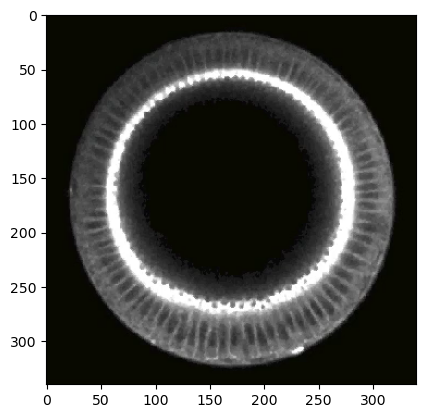

In [6]:
# load the video
cap = cv2.VideoCapture('ventral_furrow_vid_cropped.mp4')

# save the frames
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

# convert the frames to a numpy array
frames = np.array(frames)
plt.imshow(frames[0])


In [51]:
with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
    # read the data
    x = f['x'][:]
    properties = f['properties'][:]
    p = f['p'][:]

In [167]:
def index_to_time(index):
    dt = 0.1
    yield_every = 50
    return index*dt*yield_every

(3001, 199, 3)
(2, 4)


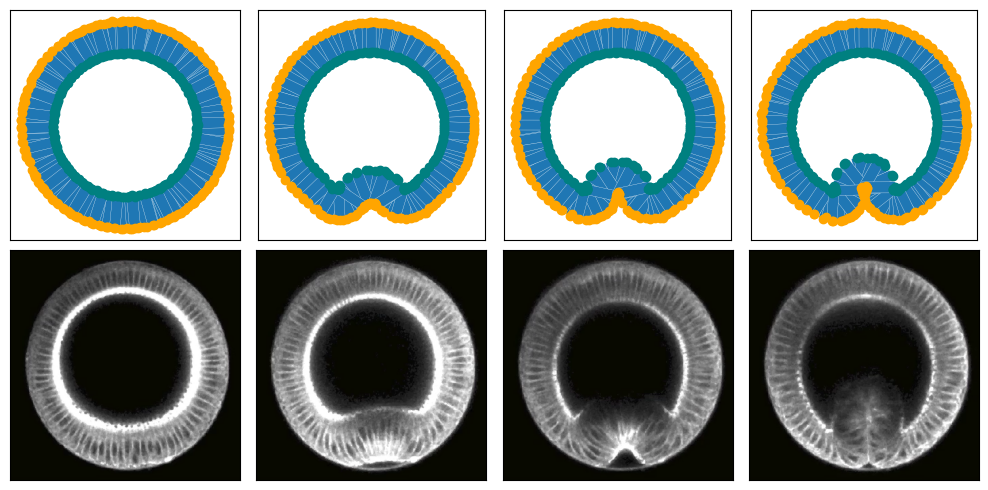

In [182]:


cutdepth = 0
cutwidth = 4

cutt = (x[0,:,0] > cutdepth) * (x[0,:,0] < cutdepth + cutwidth)

xcut = x[:,cutt,:]
pcut = p[:,cutt,:]
print(xcut.shape)



fig, allaxs = plt.subplots(2, 4, figsize=(10, 5), sharey = "row")
print(allaxs.shape)

cell_center_placement = 2/4

simspeed = 50
videospeed = 7

for i in range(4):
    axs = allaxs[:,i]
    ind = int(i*simspeed)
    # axs[0].scatter(xcut[ind, :, 1], xcut[ind, :, 2], cmap='viridis')
    # radial_vector = np.stack([xcut[ind, :, 1], xcut[ind, :, 2]], axis=1)  
    radial_p  = np.stack([pcut[ind, :, 1], pcut[ind, :, 2]], axis=1)

    # print(radial_vector.shape, radial_p.shape)
    fakeq = np.stack([-radial_p[:, 1], radial_p[:, 0]], axis=1)

    # axs[0].quiver(xcut[ind, :, 1], xcut[ind, :, 2], fakeq[:, 0], fakeq[:, 1], scale=1, scale_units='xy')


    bottoms = (xcut-cell_center_placement*6*pcut)[ind][:, 1:]
    tops = (xcut+(1-cell_center_placement)*6*pcut)[ind][:, 1:]


    #draw rectangles from -q to q for bottom and top

    width = 1.
    corners = [bottoms - fakeq*width, bottoms + fakeq*width, tops + fakeq*width, tops - fakeq*width]
    corners = np.stack(corners, axis=1)
    # draw polygons
    for c in corners:
        pol = plt.Polygon(c, fill="lightblue", edgecolor='w', lw=0.2, alpha = 1, closed=True)
        axs[0].add_patch(pol)

    axs[0].scatter(bottoms[:, 0],bottoms[:, 1], c = "teal")
    axs[0].scatter(tops[:, 0], tops[:, 1], c = "orange")

    # axs[0].scatter(xcut[ind, :, 1], xcut[ind, :, 2],  lw=0.1, c = "darkblue", s=0.7)
    axs[0].set_aspect('equal')

    axs[1].imshow(frames[i*videospeed+5])
    # cx = 170
    # cy = 164
    # axs[1].scatter((xcut+5*pcut)[ind, :, 1]*5 + cx, -(xcut+5*pcut)[ind, :, 2]*5 + cy, cmap='viridis')
    # axs[1].scatter((xcut-3.2*pcut)[ind, :, 1]*5 + cx, -(xcut-3.2*pcut)[ind, :, 2]*5 + cy, cmap='viridis')

    # remove axes
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    # set titles
    # axs[0].set_title(f"t={ind}")
plt.tight_layout()
    